## 1. <font color = red> Install and Import the Required Libraries

In [11]:
# Install all the required libraries

!pip install pdfplumber
!pip install tiktoken
!pip install openai
!pip install chromaDB
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import all the required Libraries

import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import openai
import chromadb

In [14]:
# Define the path where all pdf documents are present

content_path = "Fashiondataset.csv.csv"

In [15]:
import pandas as pd;

df=pd.read_csv(content_path)

df.head()


,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


In [40]:
## filter rows where description is not string type.
df.loc[df['description'].apply(lambda x: isinstance(x, str)), 'Text_Length'] = df['description'].apply(lambda x: len(x.split(' ')))
df.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,Metadata,Text_Length
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",{'name': 'Khushal K Women Black Ethnic Motifs ...,86
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...",{'name': 'InWeave Women Orange Solid Kurta wit...,46
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",{'name': 'Anubhutee Women Navy Blue Ethnic Mot...,88
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",{'name': 'Nayo Women Red Floral Printed Kurta ...,56
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size...",{'name': 'AHIKA Women Black & Green Printed St...,28


## 3. <font color = red> Generate and Store Embeddings using OpenAI and ChromaDB

In this section, we will embed the pages in the dataframe through OpenAI's `text-embedding-ada-002` model, and store them in a ChromaDB collection.

In [16]:
# Set the API key
filepath ="D:/UpgradSecretKey.txt.txt"

with open(filepath, "r") as f:
  openai.api_key = ' '.join(f.readlines())

In [17]:
# Import the OpenAI Embedding Function into chroma

from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

In [18]:
# Define the path where chroma collections will be stored

chroma_data_path = "D:/ChromaDbData"

In [19]:
# Call PersistentClient()

client = chromadb.PersistentClient(path=chroma_data_path)

In [20]:
# Set up the embedding function using the OpenAI embedding model

model = "text-embedding-ada-002"
embedding_function = OpenAIEmbeddingFunction(api_key=openai.api_key, model_name=model)

In [21]:
# Initialise a collection in chroma and pass the embedding_function to it so that it used OpenAI embeddings to embed the documents

fashionData = client.get_or_create_collection(name='myntra_fashion', embedding_function=embedding_function)

In [46]:
# Convert the page text and metadata from your dataframe to lists to be able to pass it to chroma
random_sample = df.sample(n=500, random_state=42)
documents_list = random_sample["description"].tolist()
metadata_list = random_sample['Metadata'].tolist()
random_sample.head()







,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,Metadata,Text_Length
5975,35,12221918.0,SASSAFRAS Women Black Solid Cropped Basic Tube...,1799.0,Black,SASSAFRAS,http://assets.myntassets.com/assets/images/122...,657.0,4.079148,Black solid cropped basic jumpsuit with waist ...,{'Body or Garment Size': 'To-Fit Denotes Body ...,{'name': 'SASSAFRAS Women Black Solid Cropped ...,27
5445,495,17365646.0,I Saw It First Women Black & Yellow Floral Pri...,1299.0,Black,I Saw It First,http://assets.myntassets.com/assets/images/173...,NaN,NaN,Black and yellow floral printed A-line above t...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",{'name': 'I Saw It First Women Black & Yellow ...,29
2666,686,17570446.0,SHOWOFF Women Blue Boyfriend Fit High-Rise Low...,3720.0,Blue,SHOWOFF,http://assets.myntassets.com/assets/images/175...,NaN,NaN,"<ul> <li> Dark shade, light fade blue jeans <...","{'Add-Ons': 'NA', 'Body or Garment Size': 'To-...",{'name': 'SHOWOFF Women Blue Boyfriend Fit Hig...,48
5145,195,17829400.0,Forever New Pink Katerina Belted Tiered Skirt,5200.0,Pink,Forever New,http://assets.myntassets.com/assets/images/178...,NaN,NaN,<p></p><ul><li>A flowing romantic skirt to wea...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,324,33...",{'name': 'Forever New Pink Katerina Belted Tie...,78
7754,324,16012536.0,Fabindia Blue Embroidered Tunic,2690.0,Blue,Fabindia,http://assets.myntassets.com/assets/images/160...,NaN,NaN,"Blue embroidered tunic ,has a round neck, thr...",{'Body or Garment Size': 'To-Fit Denotes Body ...,"{'name': 'Fabindia Blue Embroidered Tunic', 'c...",24


In [92]:

# saving the dataframe
random_sample.to_csv('processedFashionData.csv')

In [93]:
random_sample=pd.read_csv('processedFashionData.csv')

In [94]:
random_sample.head()

,Unnamed: 0.1,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,Metadata,Text_Length
0,5975,35,12221918.0,SASSAFRAS Women Black Solid Cropped Basic Tube...,1799.0,Black,SASSAFRAS,http://assets.myntassets.com/assets/images/122...,657.0,4.079148,Black solid cropped basic jumpsuit with waist ...,{'Body or Garment Size': 'To-Fit Denotes Body ...,{'name': 'SASSAFRAS Women Black Solid Cropped ...,27
1,5445,495,17365646.0,I Saw It First Women Black & Yellow Floral Pri...,1299.0,Black,I Saw It First,http://assets.myntassets.com/assets/images/173...,NaN,NaN,Black and yellow floral printed A-line above t...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...",{'name': 'I Saw It First Women Black & Yellow ...,29
2,2666,686,17570446.0,SHOWOFF Women Blue Boyfriend Fit High-Rise Low...,3720.0,Blue,SHOWOFF,http://assets.myntassets.com/assets/images/175...,NaN,NaN,"<ul> <li> Dark shade, light fade blue jeans <...","{'Add-Ons': 'NA', 'Body or Garment Size': 'To-...",{'name': 'SHOWOFF Women Blue Boyfriend Fit Hig...,48
3,5145,195,17829400.0,Forever New Pink Katerina Belted Tiered Skirt,5200.0,Pink,Forever New,http://assets.myntassets.com/assets/images/178...,NaN,NaN,<p></p><ul><li>A flowing romantic skirt to wea...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,324,33...",{'name': 'Forever New Pink Katerina Belted Tie...,78
4,7754,324,16012536.0,Fabindia Blue Embroidered Tunic,2690.0,Blue,Fabindia,http://assets.myntassets.com/assets/images/160...,NaN,NaN,"Blue embroidered tunic ,has a round neck, thr...",{'Body or Garment Size': 'To-Fit Denotes Body ...,"{'name': 'Fabindia Blue Embroidered Tunic', 'c...",24


In [95]:
from time import sleep

import time as time

In [55]:

## this method creates 50 batches of sampled data and then adds to chroma db collection . The openAi has token limit per minute 
## restriction hence added some sleep time to process all the data in some batches.

def create_batches(doc_list, metadata_list, batch_size):
    for i in range(0, len(doc_list), batch_size):
        yield doc_list[i:i + batch_size], metadata_list[i:i + batch_size]

# Example usage:
doc_list = documents_list  # Replace with your actual docList
metadata_list = metadata_list

batch_size = 10
batches = list(create_batches(doc_list, metadata_list, batch_size))
currentCount=0
# Displaying the batches
for batch_number, (doc_batch, metadata_batch) in enumerate(batches, 1):
    fashionData.add(
    documents= doc_batch,
    ids = [str(i) for i in range(currentCount, currentCount+len(doc_batch))],
    metadatas = metadata_batch
    )
    currentCount+=len(doc_batch)+1
    print("addded batch "+ str(batch_number))
    time.sleep(10)

Add of existing embedding ID: 0
Add of existing embedding ID: 1
Add of existing embedding ID: 2
Add of existing embedding ID: 3
Add of existing embedding ID: 4
Add of existing embedding ID: 5
Add of existing embedding ID: 6
Add of existing embedding ID: 7
Add of existing embedding ID: 8
Add of existing embedding ID: 9
Insert of existing embedding ID: 0
Insert of existing embedding ID: 1
Insert of existing embedding ID: 2
Insert of existing embedding ID: 3
Insert of existing embedding ID: 4
Insert of existing embedding ID: 5
Insert of existing embedding ID: 6
Insert of existing embedding ID: 7
Insert of existing embedding ID: 8
Insert of existing embedding ID: 9


addded batch 1
addded batch 2
addded batch 3
addded batch 4
addded batch 5
addded batch 6
addded batch 7
addded batch 8
addded batch 9
addded batch 10
addded batch 11
addded batch 12
addded batch 13
addded batch 14
addded batch 15
addded batch 16
addded batch 17
addded batch 18
addded batch 19
addded batch 20
addded batch 21
addded batch 22
addded batch 23
addded batch 24
addded batch 25
addded batch 26
addded batch 27
addded batch 28
addded batch 29
addded batch 30
addded batch 31
addded batch 32
addded batch 33
addded batch 34
addded batch 35
addded batch 36
addded batch 37
addded batch 38
addded batch 39
addded batch 40
addded batch 41
addded batch 42
addded batch 43
addded batch 44
addded batch 45
addded batch 46
addded batch 47
addded batch 48
addded batch 49
addded batch 50


In [96]:
# Let's take a look at the first few entries in the collection

fashionData.get(
    ids = ['0','1','2'],
    include = ['embeddings', 'documents', 'metadatas']
)

{'ids': ['0', '1', '2'],
 'embeddings': [[-0.029387863352894783,
   -0.01715192385017872,
   0.012735641561448574,
   -0.04067842289805412,
   -0.0018772578332573175,
   -0.001066930708475411,
   0.008920351043343544,
   -0.017381517216563225,
   0.007151136640459299,
   -0.04791734367609024,
   0.017584098502993584,
   0.01194557175040245,
   0.010054809041321278,
   -0.016422629356384277,
   0.004493939224630594,
   0.0177056472748518,
   0.012181917205452919,
   -0.008623231202363968,
   0.008974372409284115,
   -0.023499486967921257,
   -0.003876064671203494,
   0.004733660724014044,
   -0.0017776550957933068,
   0.01004805602133274,
   0.010027797892689705,
   -0.006766231264919043,
   0.021824810653924942,
   -0.014437328092753887,
   0.0067763603292405605,
   -0.02127108722925186,
   0.007171394769102335,
   -0.013370397500693798,
   -0.01482898648828268,
   -0.034060750156641006,
   -0.011452623642981052,
   0.003477653954178095,
   0.002255410421639681,
   -0.00692829675972461

In [97]:
cache_collection = client.get_or_create_collection(name='fashion_Cache', embedding_function=embedding_function)

In [98]:
cache_collection.peek()

{'ids': ['i want jeans'],
 'embeddings': [[-0.024545682594180107,
   -0.003891308791935444,
   -0.008633534424006939,
   -0.02165256440639496,
   -0.02004236727952957,
   0.007213158067315817,
   -0.02298785001039505,
   -0.004526223987340927,
   -0.011120830662548542,
   -0.027936259284615517,
   0.010937555693089962,
   0.014635772444307804,
   0.011932474561035633,
   -0.012344841845333576,
   -0.017895439639687538,
   0.001226465916261077,
   0.028616992756724358,
   -0.002230384387075901,
   0.025357326492667198,
   -0.03207302466034889,
   -4.354301927378401e-05,
   -0.005066229030489922,
   0.008463351055979729,
   -0.02640460804104805,
   0.009595725685358047,
   -0.003914217930287123,
   0.02966427616775036,
   -0.00974627211689949,
   -0.01455722562968731,
   0.006578242871910334,
   0.013758673332631588,
   0.020657645538449287,
   -0.01553905289620161,
   -0.017240887507796288,
   -0.004221857525408268,
   -0.0028849358204752207,
   -0.001084919204004109,
   -0.001445740694

## 4. <font color = red> Semantic Search with Cache

In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

In [59]:
# Read the user query

query = input()


i want jeans


In [72]:
# Searh the Cache collection first
# Query the collection against the user query and return the top 20 results

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

print(cache_results)

{'ids': [['i want jeans']], 'distances': [[0.0]], 'metadatas': [[{'distances0': '0.32377466559410095', 'distances1': '0.32883840799331665', 'distances2': '0.3300894498825073', 'distances3': '0.33168888092041016', 'distances4': '0.3353859484195709', 'distances5': '0.3362337350845337', 'distances6': '0.33856725692749023', 'documents0': 'Black dark wash 5-pocket high-rise jeans, clean look, no fade, has a button fly closure, and waistband with belt loopsCotton<br>Machine-washSkinny Fit<br>The model (height 5\'8") is wearing a size 28', 'documents1': 'Blue dark wash 5-pocket mid-rise jeans, clean look, light fade, has a button and zip closure, and waistband with belt loopsStraight Fit<br>Stretchable<br>The model (height 5\'8") is wearing a size 2896% Cotton, 4% Elastane<br>Machine-wash', 'documents2': 'Black dark wash 5-pocket mid-rise jeans, slash knee, no fade, has a button and zip closure, and waistband with belt loopsSlim Fit<br>The model (height 5\'8") is wearing a size 28Cotton<br>Ma

In [103]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search



def searchInCache(query,cache_collection):
    cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
    )
    return cache_results


def searchData(query,threshold,cache_collection,results_df):


# If the distance is greater than the threshold, then return the results from the main collection.
    cache_results=searchInCache(query,cache_collection)

    if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
      # Query the collection against the user query and return the top 10 results
          results = fashionData.query(
          query_texts=query,
          n_results=10
          )

      # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
      # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
          Keys = []
          Values = []
      #print(results)

          for key, val in results.items():
            if key != 'embeddings':
              for i in range(len(results)):
                if val is not None:
                    Keys.append(str(key)+str(i))
               # print(key)
                    Values.append(str(val[0][i]))


          cache_collection.add(
              documents= [query],
              ids = [query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
              metadatas = dict(zip(Keys, Values))
          )

          print("Not found in cache. Found in main collection.")

          result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs":results["ids"][0]}
          results_df = pd.DataFrame.from_dict(result_dict)
          results_df


# If the distance is, however, less than the threshold, you can return the results from cache

    elif cache_results['distances'][0][0] <= threshold:
      cache_result_dict = cache_results['metadatas'][0][0]

      # Loop through each inner list and then through the dictionary
      for key, value in cache_result_dict.items():
          if 'ids' in key:
              ids.append(value)
          elif 'documents' in key:
              documents.append(value)
          elif 'distances' in key:
              distances.append(value)
          elif 'metadatas' in key:
              metadatas.append(value)

      print("Found in cache!")

      # Create a DataFrame
      results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
      })
    
    return results_df


In [102]:
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()




In [144]:

query = input()


results_df=searchData(query,threshold,cache_collection,results_df)

help me find red or white top
Not found in cache. Found in main collection.


In [145]:
results_df


,Metadatas,Documents,Distances,IDs
0,"{'brand': 'Colour Me by Melange', 'color': 'Wh...",<ul> <li> White regular top </li> <li> Solid <...,0.336761,389
1,"{'brand': 'Bhama Couture', 'color': 'Red', 'na...",Red solid woven A-line top with gathered and e...,0.353052,152
2,"{'brand': 'Remanika', 'color': 'Red', 'name': ...",<ul> <li> Red and cherry tomato crop shirt sty...,0.354479,169
3,"{'brand': 'DressBerry', 'color': 'White', 'nam...","White and Black striped woven regular top, ha...",0.361686,113
4,"{'brand': 'max', 'color': 'Yellow', 'name': 'm...",<ul><li>Yellow regular a-line top</li><li>Self...,0.362786,457
5,"{'brand': 'AND', 'color': 'Blue', 'name': 'AND...",This clothing set consists of top and trousers...,0.366097,324
6,"{'brand': 'Divena', 'color': 'Yellow', 'name':...","<ul><li>Peach-coloured,&nbsp;pink and white re...",0.366126,28
7,"{'brand': 'RARE', 'color': 'White', 'name': 'R...","White solid woven regular top, has a square ne...",0.367724,319
8,"{'brand': 'Bhama Couture', 'color': 'Mustard',...",<ul><li>Mustard yellow and white regular top</...,0.367888,130
9,"{'brand': 'MANGO', 'color': 'White', 'name': '...",<ul><li>White regular boxy apron top</li><li>S...,0.367929,194


## 5. <font color = red> Re-Ranking with a Cross Encoder

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

<br>

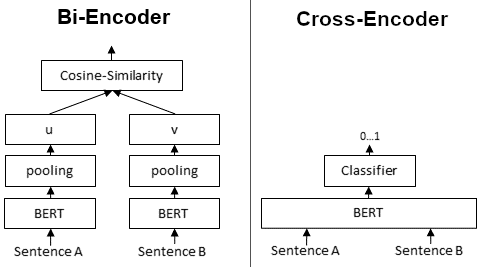

<br>

In [75]:
# Import the CrossEncoder library from sentence_transformers

from sentence_transformers import CrossEncoder, util

In [76]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

C:\ProgramData\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\apara\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [146]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [147]:
cross_rerank_scores

array([ -5.311004 ,  -3.82547  ,  -7.225606 ,  -3.9844513, -10.419913 ,
        -6.4825983,  -6.8631406,  -4.1627374,  -6.201479 ,  -7.5862284],
      dtype=float32)

In [148]:
# Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [149]:
results_df

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'brand': 'Colour Me by Melange', 'color': 'Wh...",<ul> <li> White regular top </li> <li> Solid <...,0.336761,389,-5.311004
1,"{'brand': 'Bhama Couture', 'color': 'Red', 'na...",Red solid woven A-line top with gathered and e...,0.353052,152,-3.825470
2,"{'brand': 'Remanika', 'color': 'Red', 'name': ...",<ul> <li> Red and cherry tomato crop shirt sty...,0.354479,169,-7.225606
3,"{'brand': 'DressBerry', 'color': 'White', 'nam...","White and Black striped woven regular top, ha...",0.361686,113,-3.984451
4,"{'brand': 'max', 'color': 'Yellow', 'name': 'm...",<ul><li>Yellow regular a-line top</li><li>Self...,0.362786,457,-10.419913
5,"{'brand': 'AND', 'color': 'Blue', 'name': 'AND...",This clothing set consists of top and trousers...,0.366097,324,-6.482598
6,"{'brand': 'Divena', 'color': 'Yellow', 'name':...","<ul><li>Peach-coloured,&nbsp;pink and white re...",0.366126,28,-6.863141
7,"{'brand': 'RARE', 'color': 'White', 'name': 'R...","White solid woven regular top, has a square ne...",0.367724,319,-4.162737
8,"{'brand': 'Bhama Couture', 'color': 'Mustard',...",<ul><li>Mustard yellow and white regular top</...,0.367888,130,-6.201479
9,"{'brand': 'MANGO', 'color': 'White', 'name': '...",<ul><li>White regular boxy apron top</li><li>S...,0.367929,194,-7.586228


In [150]:
# Return the top 3 results from semantic search

top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'brand': 'Colour Me by Melange', 'color': 'Wh...",<ul> <li> White regular top </li> <li> Solid <...,0.336761,389,-5.311004
1,"{'brand': 'Bhama Couture', 'color': 'Red', 'na...",Red solid woven A-line top with gathered and e...,0.353052,152,-3.825470
2,"{'brand': 'Remanika', 'color': 'Red', 'name': ...",<ul> <li> Red and cherry tomato crop shirt sty...,0.354479,169,-7.225606


In [151]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
1,"{'brand': 'Bhama Couture', 'color': 'Red', 'na...",Red solid woven A-line top with gathered and e...,0.353052,152,-3.825470
3,"{'brand': 'DressBerry', 'color': 'White', 'nam...","White and Black striped woven regular top, ha...",0.361686,113,-3.984451
7,"{'brand': 'RARE', 'color': 'White', 'name': 'R...","White solid woven regular top, has a square ne...",0.367724,319,-4.162737


In [152]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [153]:
top_3_RAG

,Documents,Metadatas
1,Red solid woven A-line top with gathered and e...,"{'brand': 'Bhama Couture', 'color': 'Red', 'na..."
3,"White and Black striped woven regular top, ha...","{'brand': 'DressBerry', 'color': 'White', 'nam..."
7,"White solid woven regular top, has a square ne...","{'brand': 'RARE', 'color': 'White', 'name': 'R..."


## 6. Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 3.5 along with the user query and a well-engineered prompt, to generate a direct answer to the query along with citations, rather than returning whole pages/chunks.

In [117]:
# Define the function to generate the response. Provide a comprehensive prompt that passes the user query and the top 3 results to the model

def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
                {"role": "system", "content":  "You are a helpful assistant in the women fashion domain who can effectively answer fashion suggestion queries"},
                {"role": "user", "content": f"""You are a helpful assistant in the women fashion domain who can effectively answer fashion suggestion queries.
                                                You have a question asked by the user in '{query}' and you have some search results from a corpus of fashion data in the dataframe '{top_3_RAG}'. These search results are essentially list of fashion suggestions with respect to user query.

                                                The column 'documents' inside this dataframe contains the actual description of the project and the column 'metadata' contains the product name,brand. The text in the description can contain html tags.For the sake of clarity and user experience, ignore HTML tags in the data.

                                                Use the documents in '{top_3_RAG}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant suggestion ,product name and brand as citations.

                                                Follow the guidelines below when performing the task.
                                                1. Try to provide relevant/accurate numbers if available.
                                                2. You don’t have to necessarily use all the information in the dataframe. Only choose information that is relevant.
                                                3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular in format.
                                                3. Use the Metadatas columns in the dataframe to retrieve and cite the product names,brand as citation.
                                                4. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited data.
                                                5. You are a customer facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                                The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.

                                                """},
              ]

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    return response.choices[0].message.content.split('\n')

In [154]:
# Generate the response

response = generate_response(query, top_3_RAG)

In [155]:
# Print the response

print("\n".join(response))

Sure! I can help you find a red or white top. Here are some options for you:

1. Red Solid Woven A-line Top by Bhama Couture
- This top is red in color, with a solid woven fabric. It has a gathered and elasticated detail and a round neck. 

2. White and Black Striped Woven Regular Top by DressBerry
- This top is white with black stripes. It is made of woven fabric and has a regular fit. 

3. White Solid Woven Regular Top by RARE
- This top is white in color and made of solid woven fabric. It has a square neckline and a regular fit. 

Please let me know if you need more information or if you would like to see any other options.

Citations:
- Red Solid Woven A-line Top: Bhama Couture
- White and Black Striped Woven Regular Top: DressBerry
- White Solid Woven Regular Top: RARE
